In [120]:
import numpy as np
import numpy.random as rd
import pandas as pd

import seaborn as sns
import math
import sklearn

import pystan
from pystan import StanModel

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_T = pd.read_csv('Listeria_data_Trans.csv')
print(df_T)

    Time      CO94      CO92      CO91      CO44      CO42      CO41  \
0      0  3.869232  1.929419  1.176091  4.010724  1.977724  0.823909   
1      0  3.596597  1.000000  1.000000  3.591065  1.875061  0.522879   
2      0  3.812913  1.301030  0.698970  3.672098  1.602060  0.522879   
3      6  3.361728  0.000000  0.000000  5.816241  3.781755  2.792392   
4      6  3.290035  1.176091  0.698970  5.596597  2.995635  2.929419   
5      6  3.311754  0.698970  0.698970  5.414973  2.414973  2.537819   
6     12  2.770852  1.301030  0.000000  6.012837  3.409087  2.785330   
7     12  2.653213  1.000000  0.000000  5.596597  2.919078  2.544068   
8     12  3.041393  0.000000  0.000000  5.591065  3.423246  1.698970   
9     24  3.845098  1.778151  1.397940  6.845098  4.579784  2.562293   
10    24  3.389166  0.000000  0.000000  6.103804  3.845098  3.070038   
11    24  4.462398  0.000000  0.000000  6.010724  3.845098  3.243038   
12    36  5.716003  2.845098  0.000000  7.690196  6.662758  6.59

In [3]:
df_T_2 = pd.read_csv('Listeria_data_Trans_91_92.csv')
print(df_T_2)

    Time      CO92      CO91
0      0  1.929419  1.176091
1      0  1.000000  1.000000
2      0  1.301030  0.698970
3      6  0.000000  0.000000
4      6  1.176091  0.698970
5      6  0.698970  0.698970
6     12  1.301030  0.000000
7     12  1.000000  0.000000
8     12  0.000000  0.000000
9     24  1.778151  1.397940
10    24  0.000000  0.000000
11    24  0.000000  0.000000
12    36  2.845098  0.000000
13    36  2.176091  0.000000
14    36  0.000000  0.000000
15    48  5.939519  0.000000
16    48  4.477121  0.000000
17    48  3.638489  0.000000
18    60  6.647383  0.000000
19    60  4.875061  0.000000
20    60  6.875061  0.000000
21    72  7.484300  0.000000
22    72  7.537819  0.000000


In [4]:
C94 = df_T.iloc[0:24 , 1]
C92 = df_T_2.iloc[0:23 , 1]
C91 = df_T_2.iloc[0:23 , 2]
C44 = df_T.iloc[0:24 , 4]
C42 = df_T.iloc[0:24 , 5]
C41 = df_T.iloc[0:24 , 6]

E94 = df_T.iloc[0:24 , 7]
E92 = df_T.iloc[0:24 , 8]
E91 = df_T.iloc[0:24 , 9]
E44 = df_T.iloc[0:24 , 10]
E42 = df_T.iloc[0:24 , 11]
E41 = df_T.iloc[0:24 , 12]

#Time
ts = df_T.iloc[0:24, 0].values
ts_2 = df_T_2.iloc[0:23, 0].values

#個数N
N = len(df_T)
N_2 = len(df_T_2)

In [5]:
ts_add = np.arange(0.2, 72.1, 20/100, dtype="float")

In [6]:
ts_add

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2,
       24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4,
       26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6,
       28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30. , 30

In [7]:
N_add = len(ts_add)

In [8]:
dat_C94 = {'N' : N, 'ts' : ts, 'y' : C94, 'N_add' : N_add, 'ts_add': ts_add}
dat_C92 = {'N' : N_2, 'ts' : ts_2, 'y' : C92, 'N_add' : N_add, 'ts_add': ts_add}
dat_C91 = {'N' : N_2, 'ts' : ts_2, 'y' : C91, 'N_add' : N_add, 'ts_add': ts_add}
dat_C44 = {'N' : N, 'ts' : ts, 'y' : C44, 'N_add' : N_add, 'ts_add': ts_add}
dat_C42 = {'N' : N, 'ts' : ts, 'y' : C42, 'N_add' : N_add, 'ts_add': ts_add}
dat_C41 = {'N' : N, 'ts' : ts, 'y' : C41, 'N_add' : N_add, 'ts_add': ts_add}

dat_E94 = {'N' : N, 'ts' : ts, 'y' : E94, 'N_add' : N_add, 'ts_add': ts_add}
dat_E92 = {'N' : N, 'ts' : ts, 'y' : E92, 'N_add' : N_add, 'ts_add': ts_add}
dat_E91 = {'N' : N, 'ts' : ts, 'y' : E91, 'N_add' : N_add, 'ts_add': ts_add}
dat_E44 = {'N' : N, 'ts' : ts, 'y' : E44, 'N_add' : N_add, 'ts_add': ts_add}
dat_E42 = {'N' : N, 'ts' : ts, 'y' : E42, 'N_add' : N_add, 'ts_add': ts_add}
dat_E41 = {'N' : N, 'ts' : ts, 'y' : E41, 'N_add' : N_add, 'ts_add': ts_add}

In [20]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);
 lag ~ cauchy(20, 3);
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cd185a1eeb702c8aa9872b348623e0b2 NOW.


CPU times: user 1.43 s, sys: 80 ms, total: 1.51 s
Wall time: 59.4 s


In [21]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C94 = stm.sampling(data=dat_C94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.5 s, sys: 252 ms, total: 3.75 s
Wall time: 10.2 s


In [22]:
print(fit_C94)

Inference for Stan model: anon_model_cd185a1eeb702c8aa9872b348623e0b2.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.14  7.4e-3   0.44   6.32   6.85   7.12    7.4    8.1   3542    1.0
N0           1.57    0.01   0.79   0.15   0.97   1.59   2.14   3.03   3128    1.0
mumax        0.22  8.7e-4   0.05   0.14   0.19   0.22   0.26   0.32   3100    1.0
lag        2.0e-3  6.4e-5 4.1e-3 7.0e-5 4.2e-4 9.4e-4 2.0e-3   0.01   4212    1.0
sigma        0.82  2.2e-3   0.14    0.6   0.72   0.81    0.9   1.14   3966    1.0
y_add[1]     3.48  3.1e-3   0.29   2.91   3.28   3.47   3.67   4.07   8779    1.0
y_add[2]     3.48  3.1e-3   0.29   2.91   3.28   3.47   3.67   4.07   8782    1.0
y_add[3]     3.48  3.1e-3   0.29   2.91   3.29   3.47   3.67   4.07   8784    1.0
y_add[4]     3.48  3.1e-3   0.29   2.91   3.29   3.47   3.67   4.07   87

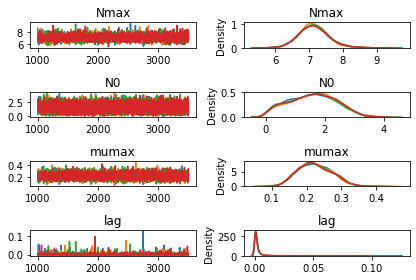

In [23]:
samples = fit_C94.extract(permuted=False, inc_warmup=True)
paraname = fit_C94.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C94.extract(permuted=False, inc_warmup=True)
iter_from = fit_C94.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C94.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [131]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(0, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_22b89ee9ea669d6b49c62449a2160d52 NOW.


CPU times: user 1.45 s, sys: 128 ms, total: 1.58 s
Wall time: 1min 5s


In [132]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C92 = stm.sampling(data=dat_C92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.61 s, sys: 286 ms, total: 3.9 s
Wall time: 10.7 s


In [133]:
print(fit_C92)

Inference for Stan model: anon_model_22b89ee9ea669d6b49c62449a2160d52.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         4.68    0.08   1.85    0.6   3.46   5.05   6.03   7.63    551    1.0
N0            1.0    0.03   0.92   0.02   0.28   0.72   1.54   3.17    714    1.0
mumax        0.21    0.01   0.32 9.5e-3   0.13   0.17    0.2   0.76    737    1.0
lag          4.79    0.41  12.49 1.6e-6 1.2e-4 2.7e-3   0.94  50.41    927    1.0
sigma        1.95    0.03   0.59   1.14   1.47   1.81   2.36   3.25    539    1.0
y_add[1]     1.99    0.03   0.78    0.7    1.4    1.9   2.54   3.61    691    1.0
y_add[2]     1.99    0.03   0.78    0.7   1.41    1.9   2.54    3.6    692    1.0
y_add[3]      2.0    0.03   0.78   0.71   1.41    1.9   2.54    3.6    692    1.0
y_add[4]      2.0    0.03   0.77   0.71   1.41    1.9   2.54    3.6    6

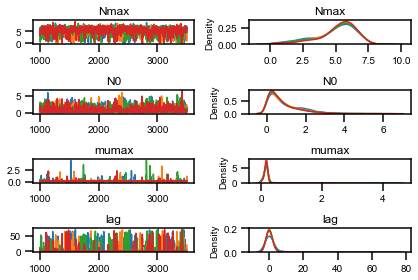

In [125]:
samples = fit_C92.extract(permuted=False, inc_warmup=True)
paraname = fit_C92.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C92.extract(permuted=False, inc_warmup=True)
iter_from = fit_C92.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C92.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [47]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(1, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);
 
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e1e4b14611609810f9e89e991a5973d8 NOW.


CPU times: user 1.7 s, sys: 103 ms, total: 1.81 s
Wall time: 1min 5s


In [48]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C91 = stm.sampling(data=dat_C91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.53 s, sys: 241 ms, total: 3.77 s
Wall time: 8.1 s


In [49]:
print(fit_C91)

Inference for Stan model: anon_model_e1e4b14611609810f9e89e991a5973d8.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         0.09  9.3e-4   0.07 3.5e-3   0.03   0.07   0.13   0.24   5325    1.0
N0           1.01  3.0e-3   0.22   0.57   0.88   1.02   1.15   1.43   5065    1.0
mumax        0.59    0.01    0.7   0.04   0.12   0.29   0.82   2.57   3787    1.0
lag          1.07    0.04   2.24   0.01   0.16   0.46   1.24   5.12   3338    1.0
sigma        0.36  7.9e-4   0.06   0.27   0.32   0.36    0.4    0.5   5343    1.0
y_add[1]     0.76  3.0e-3   0.19    0.4   0.63   0.77    0.9   1.13   4206    1.0
y_add[2]     0.68  3.3e-3    0.2   0.29   0.52   0.68   0.83   1.05   3911    1.0
y_add[3]     0.62  3.4e-3   0.21   0.23   0.45   0.62   0.78   0.99   3804    1.0
y_add[4]     0.57  3.4e-3   0.21    0.2    0.4   0.57   0.74   0.95   37

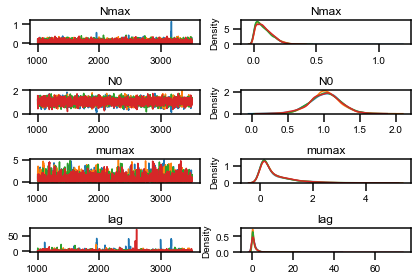

In [50]:
samples = fit_C91.extract(permuted=False, inc_warmup=True)
paraname = fit_C91.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C91.extract(permuted=False, inc_warmup=True)
iter_from = fit_C91.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C91.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [51]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(2, 1);
 sigma ~ cauchy(0, 0.5);
 
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7f49f9c433cc7630ca579a9879b013fb NOW.


CPU times: user 1.54 s, sys: 156 ms, total: 1.7 s
Wall time: 1min 5s


In [52]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C44 = stm.sampling(data=dat_C44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.63 s, sys: 233 ms, total: 3.86 s
Wall time: 7.95 s


In [53]:
print(fit_C44)

Inference for Stan model: anon_model_7f49f9c433cc7630ca579a9879b013fb.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.79  2.4e-3   0.16   7.46   7.69    7.8    7.9   8.12   4684    1.0
N0           4.26  4.9e-3   0.28   3.65   4.13   4.29   4.43   4.74   3354    1.0
mumax        0.24  6.5e-4   0.04   0.17   0.21   0.23   0.26   0.32   3596    1.0
lag        1.3e-3  3.1e-5 2.2e-3 2.0e-5 2.2e-4 6.1e-4 1.5e-3 6.6e-3   5101    1.0
sigma        0.48  1.3e-3   0.09   0.35   0.42   0.47   0.53   0.69   4356    1.0
y_add[1]     4.54  3.0e-3   0.23   4.11   4.38   4.52   4.67   5.05   6190    1.0
y_add[2]     4.55  2.9e-3   0.23   4.13   4.39   4.53   4.68   5.05   6240    1.0
y_add[3]     4.56  2.9e-3   0.23   4.15   4.41   4.55    4.7   5.06   6292    1.0
y_add[4]     4.58  2.8e-3   0.22   4.17   4.43   4.56   4.71   5.06   63

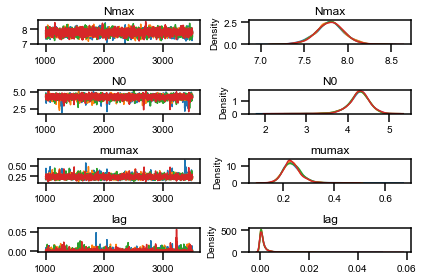

In [54]:
samples =   fit_C44.extract(permuted=False, inc_warmup=True)
paraname =  fit_C44.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C44.extract(permuted=False, inc_warmup=True)
iter_from = fit_C44.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [55]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(2, 1);
 sigma ~ cauchy(0, 0.5);
 
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_117714ff1d29d11460cbdde55b0db885 NOW.


CPU times: user 1.76 s, sys: 128 ms, total: 1.88 s
Wall time: 1min 4s


In [56]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C42 = stm.sampling(data=dat_C42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.58 s, sys: 236 ms, total: 3.82 s
Wall time: 11.5 s


In [57]:
print(fit_C42)

Inference for Stan model: anon_model_117714ff1d29d11460cbdde55b0db885.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.78  2.9e-3   0.19   7.41   7.65   7.78   7.91   8.17   4433    1.0
N0           1.37    0.01    0.5   0.17   1.09   1.48   1.74   2.12   1744    1.0
mumax        0.32  9.4e-4   0.04   0.26   0.29   0.32   0.35   0.42   1836    1.0
lag        1.4e-5  2.6e-7 1.7e-5 4.3e-7 4.1e-6 9.0e-6 1.7e-5 5.3e-5   3938    1.0
sigma        0.52  1.3e-3   0.09   0.39   0.46   0.51   0.57   0.71   4432    1.0
y_add[1]     2.35  5.0e-3   0.29   1.81   2.14   2.34   2.56   2.94   3467    1.0
y_add[2]     2.36  4.8e-3   0.29   1.83   2.15   2.35   2.56   2.94   3521    1.0
y_add[3]     2.37  4.7e-3   0.28   1.85   2.16   2.36   2.56   2.94   3579    1.0
y_add[4]     2.37  4.6e-3   0.28   1.86   2.17   2.36   2.56   2.94   36

/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


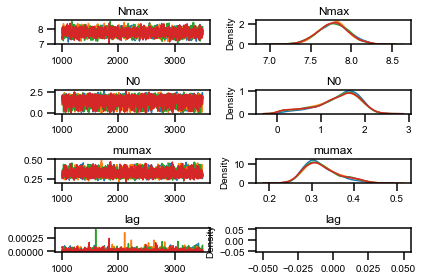

In [58]:
samples =   fit_C42.extract(permuted=False, inc_warmup=True)
paraname =  fit_C42.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C42.extract(permuted=False, inc_warmup=True)
iter_from = fit_C42.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [59]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(2, 1);
 sigma ~ cauchy(0, 0.5);
 
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5192d3aa3c904e4e48ef478c86d65940 NOW.


CPU times: user 1.59 s, sys: 108 ms, total: 1.7 s
Wall time: 1min 4s


In [60]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C41 = stm.sampling(data=dat_C41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.67 s, sys: 241 ms, total: 3.91 s
Wall time: 9.63 s


In [61]:
print(fit_C41)

Inference for Stan model: anon_model_5192d3aa3c904e4e48ef478c86d65940.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          7.6  4.7e-3   0.31   6.98    7.4   7.61   7.81    8.2   4386    1.0
N0           0.69  6.7e-3   0.38   0.04   0.39   0.69   0.97   1.44   3211    1.0
mumax         0.3  5.1e-4   0.03   0.25   0.28    0.3   0.33   0.36   3426    1.0
lag        7.0e-6  2.3e-7 1.6e-5 8.4e-8 9.9e-7 2.8e-6 7.1e-6 3.9e-5   4807    1.0
sigma        0.77  1.9e-3   0.13   0.57   0.68   0.76   0.85   1.07   4622    1.0
y_add[1]     1.65  5.3e-3    0.4   0.92   1.37   1.65   1.93   2.45   5610    1.0
y_add[2]     1.66  5.2e-3    0.4   0.93   1.38   1.65   1.93   2.45   5666    1.0
y_add[3]     1.67  5.2e-3   0.39   0.95   1.39   1.65   1.93   2.45   5724    1.0
y_add[4]     1.67  5.1e-3   0.39   0.97    1.4   1.66   1.94   2.45   57

/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


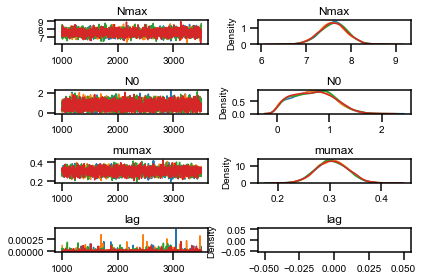

In [62]:
samples =   fit_C41.extract(permuted=False, inc_warmup=True)
paraname =  fit_C41.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C41.extract(permuted=False, inc_warmup=True)
iter_from = fit_C41.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [77]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(9, 1);
 mumax ~ cauchy(0, 1);
 sigma ~ cauchy(0, 0.5);
 lag ~ cauchy(0, 1);
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4e0aee85c21db95a47b93e54c60a81f6 NOW.


CPU times: user 1.53 s, sys: 337 ms, total: 1.86 s
Wall time: 1min 4s


In [78]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E94 = stm.sampling(data=dat_E94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.74 s, sys: 285 ms, total: 4.03 s
Wall time: 27.9 s


In [80]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E92 = stm.sampling(data=dat_E92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.58 s, sys: 288 ms, total: 3.87 s
Wall time: 16.2 s


In [81]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E91 = stm.sampling(data=dat_E91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.63 s, sys: 293 ms, total: 3.92 s
Wall time: 21.5 s


In [83]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(0, 1);
 sigma ~ cauchy(0, 0.5);
 lag ~ cauchy(0, 1);
 
 
 for (i in 1:N) 
    y[i] ~ normal((log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts[i])/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = log10(10^Nmax) + log10(-1 + exp(mumax * lag) + exp(mumax * ts_add[n])/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(log10(10^Nmax) - log10(10^N0)))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''
%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_691b4db317a90ab4190907bfb905cf6b NOW.


CPU times: user 1.57 s, sys: 123 ms, total: 1.69 s
Wall time: 1min 4s


In [84]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E44 = stm.sampling(data=dat_E44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.63 s, sys: 297 ms, total: 3.93 s
Wall time: 34 s


In [86]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E42 = stm.sampling(data=dat_E42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.42 s, sys: 234 ms, total: 3.66 s
Wall time: 18.3 s


In [87]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E41 = stm.sampling(data=dat_E41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.44 s, sys: 266 ms, total: 3.71 s
Wall time: 21 s


In [79]:
print(fit_E94)

Inference for Stan model: anon_model_4e0aee85c21db95a47b93e54c60a81f6.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.74    0.01   0.44   7.74    8.6    8.8   8.94   9.37    918    1.0
N0           8.08    0.03    1.2   4.39    7.9   8.49   8.76   9.08   1527    1.0
mumax        1.15    0.02   0.98   0.03   0.44   0.87   1.55   3.89   2987    1.0
lag          1.12    0.03   1.79   0.06   0.33   0.64   1.25   5.14   3484    1.0
sigma        0.23  5.7e-4   0.04   0.17    0.2   0.22   0.25   0.31   4149    1.0
y_add[1]     8.87  1.6e-3   0.11   8.63   8.79   8.88   8.95   9.06   4643    1.0
y_add[2]     8.88  1.5e-3   0.11   8.65   8.81   8.89   8.96   9.06   5130    1.0
y_add[3]     8.89  1.4e-3   0.11   8.66   8.82    8.9   8.97   9.07   5543    1.0
y_add[4]      8.9  1.4e-3    0.1   8.67   8.83   8.91   8.98   9.07   58

In [88]:
print(fit_E92)

Inference for Stan model: anon_model_4e0aee85c21db95a47b93e54c60a81f6.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.83  5.3e-3   0.19   8.38   8.74   8.85   8.96    9.1   1310    1.0
N0           8.17    0.02    0.9   5.52   7.97   8.46   8.72   8.94   1785    1.0
mumax        1.39    0.02   0.95   0.28   0.72   1.12   1.79   4.05   2501    1.0
lag          0.59    0.01   0.73   0.04   0.25   0.44   0.73    2.0   3070    1.0
sigma        0.14  3.8e-4   0.02    0.1   0.12   0.14   0.15   0.19   3631    1.0
y_add[1]     8.88  1.2e-3   0.08   8.72   8.83   8.88   8.93   9.04   4476    1.0
y_add[2]     8.89  1.1e-3   0.08   8.74   8.84   8.89   8.95   9.05   4672    1.0
y_add[3]     8.91  1.2e-3   0.08   8.75   8.86   8.91   8.97   9.06   4684    1.0
y_add[4]     8.93  1.2e-3   0.08   8.76   8.87   8.93   8.98   9.07   45

In [89]:
print(fit_E91)

Inference for Stan model: anon_model_4e0aee85c21db95a47b93e54c60a81f6.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.78  4.5e-3   0.19   8.36   8.69    8.8   8.91   9.06   1792    1.0
N0           8.18    0.02   0.89   5.65   7.97   8.48   8.72   8.92   1350    1.0
mumax        1.45    0.02   0.96   0.33   0.76   1.17   1.89   4.02   2026    1.0
lag           0.6    0.01   0.58   0.04   0.28   0.48   0.77   1.92   3175    1.0
sigma        0.12  2.8e-4   0.02   0.09    0.1   0.11   0.13   0.16   4614    1.0
y_add[1]     8.88  8.7e-4   0.07   8.75   8.84   8.88   8.92   9.01   5750    1.0
y_add[2]      8.9  9.2e-4   0.07   8.76   8.85    8.9   8.94   9.02   5299    1.0
y_add[3]     8.91  1.0e-3   0.07   8.77   8.87   8.91   8.96   9.04   4689    1.0
y_add[4]     8.93  1.1e-3   0.07   8.78   8.88   8.93   8.98   9.05   41

In [90]:
print(fit_E44)

Inference for Stan model: anon_model_691b4db317a90ab4190907bfb905cf6b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.08  2.6e-4   0.02   9.05   9.07   9.08    9.1   9.12   4688    1.0
N0           3.34    0.01   0.68   1.49   3.05   3.55   3.84   4.06   2281    1.0
mumax        1.91  5.5e-3   0.26   1.62   1.72   1.83   2.02   2.61   2294    1.0
lag        3.2e-6  2.5e-8 1.3e-6 3.2e-7 2.3e-6 3.6e-6 4.2e-6 5.1e-6   2873    1.0
sigma        0.08  2.0e-4   0.01   0.06   0.07   0.07   0.08    0.1   3714    1.0
y_add[1]     4.13  9.1e-4   0.06   4.02   4.09   4.13   4.18   4.25   4307    1.0
y_add[2]      4.2  1.7e-3   0.09   4.04   4.13    4.2   4.27   4.38   3235    1.0
y_add[3]     4.28  2.4e-3   0.13   4.05   4.17   4.28   4.39   4.51   2983    1.0
y_add[4]     4.36  3.2e-3   0.17   4.06   4.22   4.37   4.51   4.64   28

In [91]:
print(fit_E42)

Inference for Stan model: anon_model_691b4db317a90ab4190907bfb905cf6b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.07  4.0e-4   0.03   9.01   9.05   9.07   9.09   9.12   4685    1.0
N0           3.02    0.03   0.77    0.8   2.73   3.28   3.56   3.79    813    1.0
mumax        1.99    0.01    0.3   1.68   1.79   1.89    2.1   2.85    825    1.0
lag        1.6e-6  1.4e-8 7.2e-7 1.3e-7 1.1e-6 1.7e-6 2.1e-6 2.9e-6   2817    1.0
sigma        0.11  3.0e-4   0.02   0.08    0.1   0.11   0.13   0.16   4335    1.0
y_add[1]     3.84  1.2e-3   0.08   3.69   3.79   3.84    3.9    4.0   4689    1.0
y_add[2]     3.91  2.1e-3   0.11   3.71   3.83   3.91    4.0   4.12   2719    1.0
y_add[3]     3.99  3.2e-3   0.15   3.72   3.87    4.0   4.11   4.26   2184    1.0
y_add[4]     4.08  4.4e-3   0.19   3.73   3.92    4.1   4.24    4.4   19

In [92]:
print(fit_E41)

Inference for Stan model: anon_model_691b4db317a90ab4190907bfb905cf6b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.05  2.9e-4   0.02   9.01   9.04   9.05   9.06   9.09   4314    1.0
N0           3.09    0.02   0.71   1.05   2.81   3.31    3.6    3.8   1505    1.0
mumax        1.96  7.0e-3   0.27   1.67   1.76   1.88   2.06   2.74   1516    1.0
lag        1.7e-6  1.6e-8 7.8e-7 9.4e-8 1.2e-6 1.9e-6 2.3e-6 2.9e-6   2558    1.0
sigma        0.08  2.2e-4   0.01   0.06   0.07   0.08   0.09   0.11   3730    1.0
y_add[1]     3.87  1.0e-3   0.06   3.75   3.82   3.86   3.91   3.99   3753    1.0
y_add[2]     3.94  2.0e-3    0.1   3.76   3.86   3.94   4.02   4.12   2637    1.0
y_add[3]     4.02  2.9e-3   0.14   3.77    3.9   4.02   4.14   4.26   2366    1.0
y_add[4]     4.11  3.9e-3   0.18   3.78   3.96   4.13   4.27    4.4   22

In [31]:
plt.rc('font',family='Arial')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [32]:
df_sd = pd.read_csv('20200525~0528.csv')
print(df_sd)

   Time  CO94.mean  CO92.mean  CO91.mean  CO44.mean  CO42.mean  CO41.mean  \
0     0   3.759581   1.410150   0.958354   3.757962   1.818282   0.623222   
1     6   3.321172   0.625020   0.465980   5.609271   3.064121   2.753210   
2    12   2.821819   0.767010   0.000000   5.733500   3.250470   2.342789   
3    24   3.898887   0.592717   0.465980   6.319875   4.089993   2.958456   
4    36   5.106021   1.673730   0.000000   7.638502   6.800803   5.699333   
5    48   6.033098   4.685043   0.000000   7.716206   7.573464   7.192440   
6    60   7.229473   6.132502   0.000000   7.851158   7.810371   7.653281   
7    72   7.206764   7.511059   0.000000   7.910520   7.916855   7.785136   

    C4.mean   C2.mean   C1.mean  ...    CO91c     CO44a     CO44b     CO44c  \
0  3.734951  1.799458  0.814566  ...  0.69897  4.010724  3.591065  3.672098   
1  5.399692  3.391057  2.684858  ...  0.69897  5.816241  5.596597  5.414973   
2  7.728824  6.034658  5.261454  ...  0.00000  6.012837  5.596597  5.

In [33]:
y_94=df_sd['CO94.mean']
y_92=df_sd['CO92.mean']
y_91=df_sd['CO91.mean']
y_44=df_sd['CO44.mean']
y_42=df_sd['CO42.mean']
y_41=df_sd['CO41.mean']
y_04=df_sd['C4.mean']
y_02=df_sd['C2.mean']
y_01=df_sd['C1.mean']

y_E94=df_sd['E94.mean']
y_E92=df_sd['E92.mean']
y_E91=df_sd['E91.mean']
y_E44=df_sd['E44.mean']
y_E42=df_sd['E42.mean']
y_E41=df_sd['E41.mean']

y_err94=df_sd['CO94.sd']
y_err92=df_sd['CO92.sd']
y_err91=df_sd['CO91.sd']
y_err44=df_sd['CO44.sd']
y_err42=df_sd['CO42.sd']
y_err41=df_sd['CO41.sd']
y_err04=df_sd['C4.sd']
y_err02=df_sd['C2.sd']
y_err01=df_sd['C1.sd']

y_errE94=df_sd['E94.sd']
y_errE92=df_sd['E92.sd']
y_errE91=df_sd['E91.sd']
y_errE44=df_sd['E44.sd']
y_errE42=df_sd['E42.sd']
y_errE41=df_sd['E41.sd']

In [93]:
samples_C94 = fit_C94.extract(permuted=True)
samples_C92 = fit_C92.extract(permuted=True)
samples_C91 = fit_C91.extract(permuted=True)
samples_C44 = fit_C44.extract(permuted=True)
samples_C42 = fit_C42.extract(permuted=True)
samples_C41 = fit_C41.extract(permuted=True)
samples_E94 = fit_E94.extract(permuted=True)
samples_E92 = fit_E92.extract(permuted=True)
samples_E91 = fit_E91.extract(permuted=True)
samples_E44 = fit_E44.extract(permuted=True)
samples_E42 = fit_E42.extract(permuted=True)
samples_E41 = fit_E41.extract(permuted=True)

In [94]:
pd.to_pickle(samples_C94, "Listeria_Pystan_Balanyi_withlag_EachC94_3500.pkl")
pd.to_pickle(samples_C92, "Listeria_Pystan_Balanyi_withlag_EachC92_3500.pkl")
pd.to_pickle(samples_C91, "Listeria_Pystan_Balanyi_withlag_EachC91_3500.pkl")
pd.to_pickle(samples_C44, "Listeria_Pystan_Balanyi_withlag_EachC44_3500.pkl")
pd.to_pickle(samples_C42, "Listeria_Pystan_Balanyi_withlag_EachC42_3500.pkl")
pd.to_pickle(samples_C41, "Listeria_Pystan_Balanyi_withlag_EachC41_3500.pkl")

pd.to_pickle(samples_E94, "Listeria_Pystan_Balanyi_withlag_EachE94_3500.pkl")
pd.to_pickle(samples_E92, "Listeria_Pystan_Balanyi_withlag_EachE92_3500.pkl")
pd.to_pickle(samples_E91, "Listeria_Pystan_Balanyi_withlag_EachE91_3500.pkl")
pd.to_pickle(samples_E44, "Listeria_Pystan_Balanyi_withlag_EachE44_3500.pkl")
pd.to_pickle(samples_E42, "Listeria_Pystan_Balanyi_withlag_EachE42_3500.pkl")
pd.to_pickle(samples_E41, "Listeria_Pystan_Balanyi_withlag_EachE41_3500.pkl")

In [72]:
#抽出
C94_add = { }

for i in range(360):
     C94_add[i /5] = samples_C94['y_rep'][:,i] 

#％分割
C94_percentile_add = { }

for i in range(360):
     C94_percentile_add[i/5] = np.percentile(C94_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C94_add = { }

for i in range(360):
     C94_add[i /5] = samples_C94['y_rep'][:,i] 

#％分割
C94_percentile_add = { }

for i in range(360):
     C94_percentile_add[i/5] = np.percentile(C94_add[i/5],q=[10,25,50,75,90])

#合算
C94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C94_percentile_add[i/5][0],
                         C94_percentile_add[i/5][1],
                         C94_percentile_add[i/5][2],
                         C94_percentile_add[i/5][3],
                         C94_percentile_add[i/5][4]], index=C94_add_df_2.columns)
    C94_add_df_2 = C94_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E94_add = { }

for i in range(360):
     E94_add[i /5] = samples_E94['y_rep'][:,i] 

#％分割
E94_percentile_add = { }

for i in range(360):
     E94_percentile_add[i/5] = np.percentile(E94_add[i/5],q=[10,25,50,75,90])

#合算
E94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E94_percentile_add[i/5][0],
                         E94_percentile_add[i/5][1],
                         E94_percentile_add[i/5][2],
                         E94_percentile_add[i/5][3],
                         E94_percentile_add[i/5][4]], index=E94_add_df_2.columns)
                         
    E94_add_df_2 = E94_add_df_2.append(tmp_se, ignore_index=True)

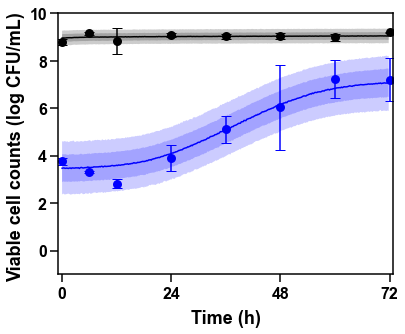

In [107]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["10"],C94_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["25"],C94_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["10"],E94_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["25"],E94_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis94_confidencial.pdf",transparent=True,bbox_inches='tight')

plt.show()

In [126]:
#抽出
C92_add = { }

for i in range(360):
     C92_add[i /5] = samples_C92['y_rep'][:,i] 

#％分割
C92_percentile_add = { }

for i in range(360):
     C92_percentile_add[i/5] = np.percentile(C92_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C92_add = { }

for i in range(360):
     C92_add[i /5] = samples_C92['y_rep'][:,i] 

#％分割
C92_percentile_add = { }

for i in range(360):
     C92_percentile_add[i/5] = np.percentile(C92_add[i/5],q=[10,25,50,75,90])

#合算
C92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C92_percentile_add[i/5][0],
                         C92_percentile_add[i/5][1],
                         C92_percentile_add[i/5][2],
                         C92_percentile_add[i/5][3],
                         C92_percentile_add[i/5][4]], index=C92_add_df_2.columns)
    C92_add_df_2 = C92_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E92_add = { }

for i in range(360):
     E92_add[i /5] = samples_E92['y_rep'][:,i] 

#％分割
E92_percentile_add = { }

for i in range(360):
     E92_percentile_add[i/5] = np.percentile(E92_add[i/5],q=[10,25,50,75,90])

#合算
E92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E92_percentile_add[i/5][0],
                         E92_percentile_add[i/5][1],
                         E92_percentile_add[i/5][2],
                         E92_percentile_add[i/5][3],
                         E92_percentile_add[i/5][4]], index=E92_add_df_2.columns)
                         
    E92_add_df_2 = E92_add_df_2.append( tmp_se, ignore_index=True)

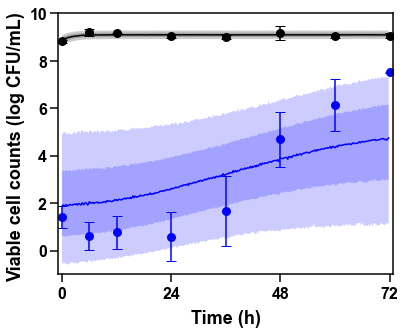

In [127]:
plt.figure(figsize=(6,4.8))


#y_Camp92
plt.errorbar(df_sd['Time'], df_sd['CO92.mean'], yerr = y_err92, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO92.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C92_add_df_2["Time"],C92_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["10"],C92_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["25"],C92_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent92
plt.errorbar(df_sd['Time'], df_sd['E92.mean'], yerr = y_errE92, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E92.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E92_add_df_2["Time"],E92_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["10"],E92_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["25"],E92_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold')

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis92_confidencial.pdf",transparent=True,bbox_inches='tight')


plt.show()

In [108]:
#抽出
C91_add = { }

for i in range(360):
     C91_add[i /5] = samples_C91['y_rep'][:,i] 

#％分割
C91_percentile_add = { }

for i in range(360):
     C91_percentile_add[i/5] = np.percentile(C91_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C91_add = { }

for i in range(360):
     C91_add[i /5] = samples_C91['y_rep'][:,i] 

#％分割
C91_percentile_add = { }

for i in range(360):
     C91_percentile_add[i/5] = np.percentile(C91_add[i/5],q=[10,25,50,75,90])

#合算
C91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C91_percentile_add[i/5][0],
                         C91_percentile_add[i/5][1],
                         C91_percentile_add[i/5][2],
                         C91_percentile_add[i/5][3],
                         C91_percentile_add[i/5][4]], index=C91_add_df_2.columns)
    C91_add_df_2 = C91_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E91_add = { }

for i in range(360):
     E91_add[i /5] = samples_E91['y_rep'][:,i] 

#％分割
E91_percentile_add = { }

for i in range(360):
     E91_percentile_add[i/5] = np.percentile(E91_add[i/5],q=[10,25,50,75,90])

#合算
E91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E91_percentile_add[i/5][0],
                         E91_percentile_add[i/5][1],
                         E91_percentile_add[i/5][2],
                         E91_percentile_add[i/5][3],
                         E91_percentile_add[i/5][4]], index=E91_add_df_2.columns)
                         
    E91_add_df_2 = E91_add_df_2.append(tmp_se, ignore_index=True)

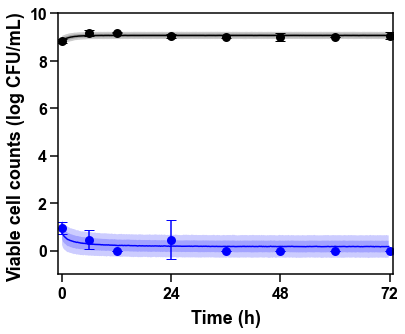

In [113]:
plt.figure(figsize=(6,4.8))


#y_Camp91
plt.errorbar(df_sd['Time'], df_sd['CO91.mean'], yerr = y_err91, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO91.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C91_add_df_2["Time"],C91_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["10"],C91_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["25"],C91_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent91
plt.errorbar(df_sd['Time'], df_sd['E91.mean'], yerr = y_errE91, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E91.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E91_add_df_2["Time"],E91_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["10"],E91_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["25"],E91_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis91_confidencial.pdf",transparent=True,bbox_inches='tight')


plt.show()

In [114]:
#抽出
C44_add = { }

for i in range(360):
     C44_add[i /5] = samples_C44['y_rep'][:,i] 

#％分割
C44_percentile_add = { }

for i in range(360):
     C44_percentile_add[i/5] = np.percentile(C44_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C44_add = { }

for i in range(360):
     C44_add[i /5] = samples_C44['y_rep'][:,i] 

#％分割
C44_percentile_add = { }

for i in range(360):
     C44_percentile_add[i/5] = np.percentile(C44_add[i/5],q=[10,25,50,75,90])

#合算
C44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C44_percentile_add[i/5][0],
                         C44_percentile_add[i/5][1],
                         C44_percentile_add[i/5][2],
                         C44_percentile_add[i/5][3],
                         C44_percentile_add[i/5][4]], index=C44_add_df_2.columns)
    C44_add_df_2 = C44_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E44_add = { }

for i in range(360):
     E44_add[i /5] = samples_E44['y_rep'][:,i] 

#％分割
E44_percentile_add = { }

for i in range(360):
     E44_percentile_add[i/5] = np.percentile(E44_add[i/5],q=[10,25,50,75,90])

#合算
E44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E44_percentile_add[i/5][0],
                         E44_percentile_add[i/5][1],
                         E44_percentile_add[i/5][2],
                         E44_percentile_add[i/5][3],
                         E44_percentile_add[i/5][4]], index=E44_add_df_2.columns)
                         
    E44_add_df_2 = E44_add_df_2.append(tmp_se, ignore_index=True)

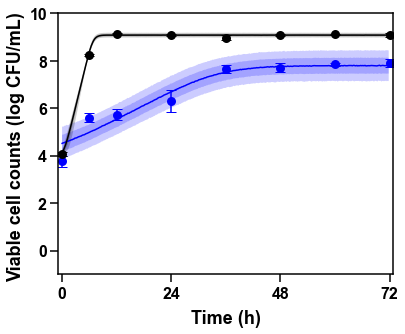

In [115]:
plt.figure(figsize=(6,4.8))


#y_Camp44
plt.errorbar(df_sd['Time'], df_sd['CO44.mean'], yerr = y_err44, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO44.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C44_add_df_2["Time"],C44_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["10"],C44_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["25"],C44_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent44
plt.errorbar(df_sd['Time'], df_sd['E44.mean'], yerr = y_errE44, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E44.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E44_add_df_2["Time"],E44_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["10"],E44_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["25"],E44_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis44_confidencial.pdf",transparent=True,bbox_inches='tight')


plt.show()

In [116]:
#抽出
C42_add = { }

for i in range(360):
     C42_add[i /5] = samples_C42['y_rep'][:,i] 

#％分割
C42_percentile_add = { }

for i in range(360):
     C42_percentile_add[i/5] = np.percentile(C42_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C42_add = { }

for i in range(360):
     C42_add[i /5] = samples_C42['y_rep'][:,i] 

#％分割
C42_percentile_add = { }

for i in range(360):
     C42_percentile_add[i/5] = np.percentile(C42_add[i/5],q=[10,25,50,75,90])

#合算
C42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C42_percentile_add[i/5][0],
                         C42_percentile_add[i/5][1],
                         C42_percentile_add[i/5][2],
                         C42_percentile_add[i/5][3],
                         C42_percentile_add[i/5][4]], index=C42_add_df_2.columns)
    C42_add_df_2 = C42_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E42_add = { }

for i in range(360):
     E42_add[i /5] = samples_E42['y_rep'][:,i] 

#％分割
E42_percentile_add = { }

for i in range(360):
     E42_percentile_add[i/5] = np.percentile(E42_add[i/5],q=[10,25,50,75,90])

#合算
E42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E42_percentile_add[i/5][0],
                         E42_percentile_add[i/5][1],
                         E42_percentile_add[i/5][2],
                         E42_percentile_add[i/5][3],
                         E42_percentile_add[i/5][4]], index=E42_add_df_2.columns)
                         
    E42_add_df_2 = E42_add_df_2.append(tmp_se, ignore_index=True)

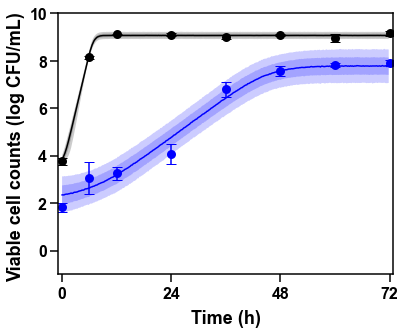

In [117]:
plt.figure(figsize=(6,4.8))


#y_Camp42
plt.errorbar(df_sd['Time'], df_sd['CO42.mean'], yerr = y_err42, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO42.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C42_add_df_2["Time"],C42_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["10"],C42_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["25"],C42_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent42
plt.errorbar(df_sd['Time'], df_sd['E42.mean'], yerr = y_errE42, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E42.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E42_add_df_2["Time"],E42_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["10"],E42_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["25"],E42_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis42_confidencial.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [118]:
#抽出
C41_add = { }

for i in range(360):
     C41_add[i /5] = samples_C41['y_rep'][:,i] 

#％分割
C41_percentile_add = { }

for i in range(360):
     C41_percentile_add[i/5] = np.percentile(C41_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C41_add = { }

for i in range(360):
     C41_add[i /5] = samples_C41['y_rep'][:,i] 

#％分割
C41_percentile_add = { }

for i in range(360):
     C41_percentile_add[i/5] = np.percentile(C41_add[i/5],q=[10,25,50,75,90])

#合算
C41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C41_percentile_add[i/5][0],
                         C41_percentile_add[i/5][1],
                         C41_percentile_add[i/5][2],
                         C41_percentile_add[i/5][3],
                         C41_percentile_add[i/5][4]], index=C41_add_df_2.columns)
    C41_add_df_2 = C41_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E41_add = { }

for i in range(360):
     E41_add[i /5] = samples_E41['y_rep'][:,i] 

#％分割
E41_percentile_add = { }

for i in range(360):
     E41_percentile_add[i/5] = np.percentile(E41_add[i/5],q=[10,25,50,75,90])

#合算
E41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         E41_percentile_add[i/5][0],
                         E41_percentile_add[i/5][1],
                         E41_percentile_add[i/5][2],
                         E41_percentile_add[i/5][3],
                         E41_percentile_add[i/5][4]], index=E41_add_df_2.columns)
                         
    E41_add_df_2 = E41_add_df_2.append(tmp_se, ignore_index=True)

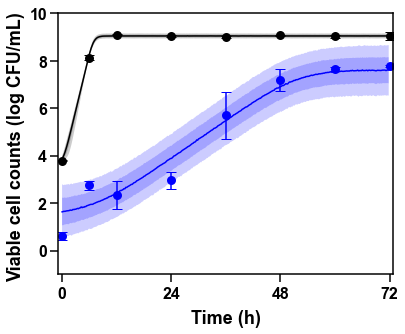

In [119]:
plt.figure(figsize=(6,4.8))


#y_Camp41
plt.errorbar(df_sd['Time'], df_sd['CO41.mean'], yerr = y_err41, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO41.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C41_add_df_2["Time"],C41_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["10"],C41_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["25"],C41_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent41
plt.errorbar(df_sd['Time'], df_sd['E41.mean'], yerr = y_errE41, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E41.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E41_add_df_2["Time"],E41_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["10"],E41_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["25"],E41_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Lis_baranyi/Lis41_confidencial.pdf",transparent=True,bbox_inches='tight')

plt.show()